In [ ]:
# //

# --- Ação 1.1: Carregar Bibliotecas e Dados ---

# Importar as bibliotecas que sempre usaremos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para deixar os gráficos com um visual mais bonito (opcional)
sns.set_theme(style="whitegrid")

print("Bibliotecas importadas!")

# Carregar o arquivo de treino
# Lembre-se do caminho relativo:
# '../' = "subir um nível" (da pasta 'notebooks' para a raiz do projeto)
# 'data/' = "entrar na pasta data"
try:
    df_train = pd.read_csv('../data/train.csv')
    print("Sucesso! Arquivo 'train.csv' carregado.")
except FileNotFoundError:
    print("ERRO: Arquivo 'train.csv' não encontrado no caminho '../data/train.csv'")
    print("Verifique se o arquivo está na pasta 'data'.")


# --- Ação 1.2: Inspeção Inicial ---

# 1. Comando .head(): Ver as primeiras 5 linhas
# Isso é para confirmar que os dados carregaram e ver o nome das colunas.
print("\n--- Visualização das primeiras 5 linhas (head) ---")
print(df_train.head())

# 2. Comando .info(): Ver o resumo técnico
# Isso é para ver o tipo de cada coluna e se há valores nulos.
print("\n--- Resumo técnico (info) ---")
df_train.info()


Bibliotecas importadas!
Sucesso! Arquivo 'train.csv' carregado.

--- Visualização das primeiras 5 linhas (head) ---
   id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            9.3              0.40         0.34             2.1   
1   1            8.3              0.38         0.33             1.8   
2   2            6.6              0.28         0.30             2.1   
3   3            8.2              0.35         0.36             2.6   
4   4           10.9              0.18         0.49             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.088                 14.0                  28.0  0.99940  3.44   
1      0.070                  5.0                  15.0  0.99820  3.39   
2      0.068                  8.0                  17.0  0.99552  3.51   
3      0.086                 14.0                  89.0  0.99910  3.23   
4      0.084                 21.0                  77.0  0.99658  3.20   

   sulphates

--- Resumo Estatístico (describe) ---
                 id  fixed acidity  volatile acidity   citric acid  \
count  15000.000000   15000.000000      15000.000000  15000.000000   
mean    7499.500000       8.141927          0.505266      0.231299   
std     4330.271354       1.381534          0.134270      0.176764   
min        0.000000       4.600000          0.120000      0.000000   
25%     3749.750000       7.200000          0.400000      0.050000   
50%     7499.500000       7.800000          0.510000      0.240000   
75%    11249.250000       8.900000          0.600000      0.380000   
max    14999.000000      15.800000          1.580000      0.740000   

       residual sugar     chlorides  free sulfur dioxide  \
count    15000.000000  15000.000000         15000.000000   
mean         2.189266      0.078641            13.234033   
std          0.505553      0.013768             7.916878   
min          1.100000      0.012000             1.000000   
25%          1.900000      0.07

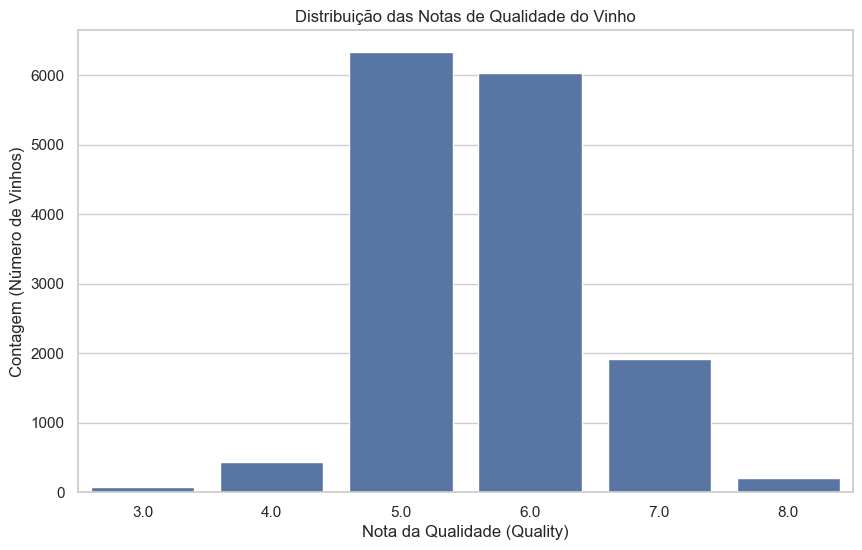

In [ ]:
# --- Ação 1.3: Resumo Estatístico e Análise da Variável-Alvo ---

# 1. Comando .describe(): Ver o resumo estatístico
# (média, desvio padrão, min, max, etc.)
print("--- Resumo Estatístico (describe) ---")
print(df_train.describe())

# 2. Vendo por gráfico! Vamos analisar a variável-alvo (quality)
# Queremos contar quantos vinhos de cada nota, nós temos.
print("\n--- Gráfico de Contagem da 'quality' ---")

# Criar a figura para o gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de contagem (countplot)
# x='quality' -> coloca a coluna 'quality' no eixo X
# data=df_train -> diz ao Seaborn para usar nosso DataFrame
sns.countplot(x='quality', data=df_train)

# Adicionar títulos e rótulos
plt.title('Distribuição das Notas de Qualidade do Vinho')
plt.xlabel('Nota da Qualidade (Quality)')
plt.ylabel('Contagem (Número de Vinhos)')

# Mostrar o gráfico
plt.show()

--- Histogramas de todas as 11 Características ---


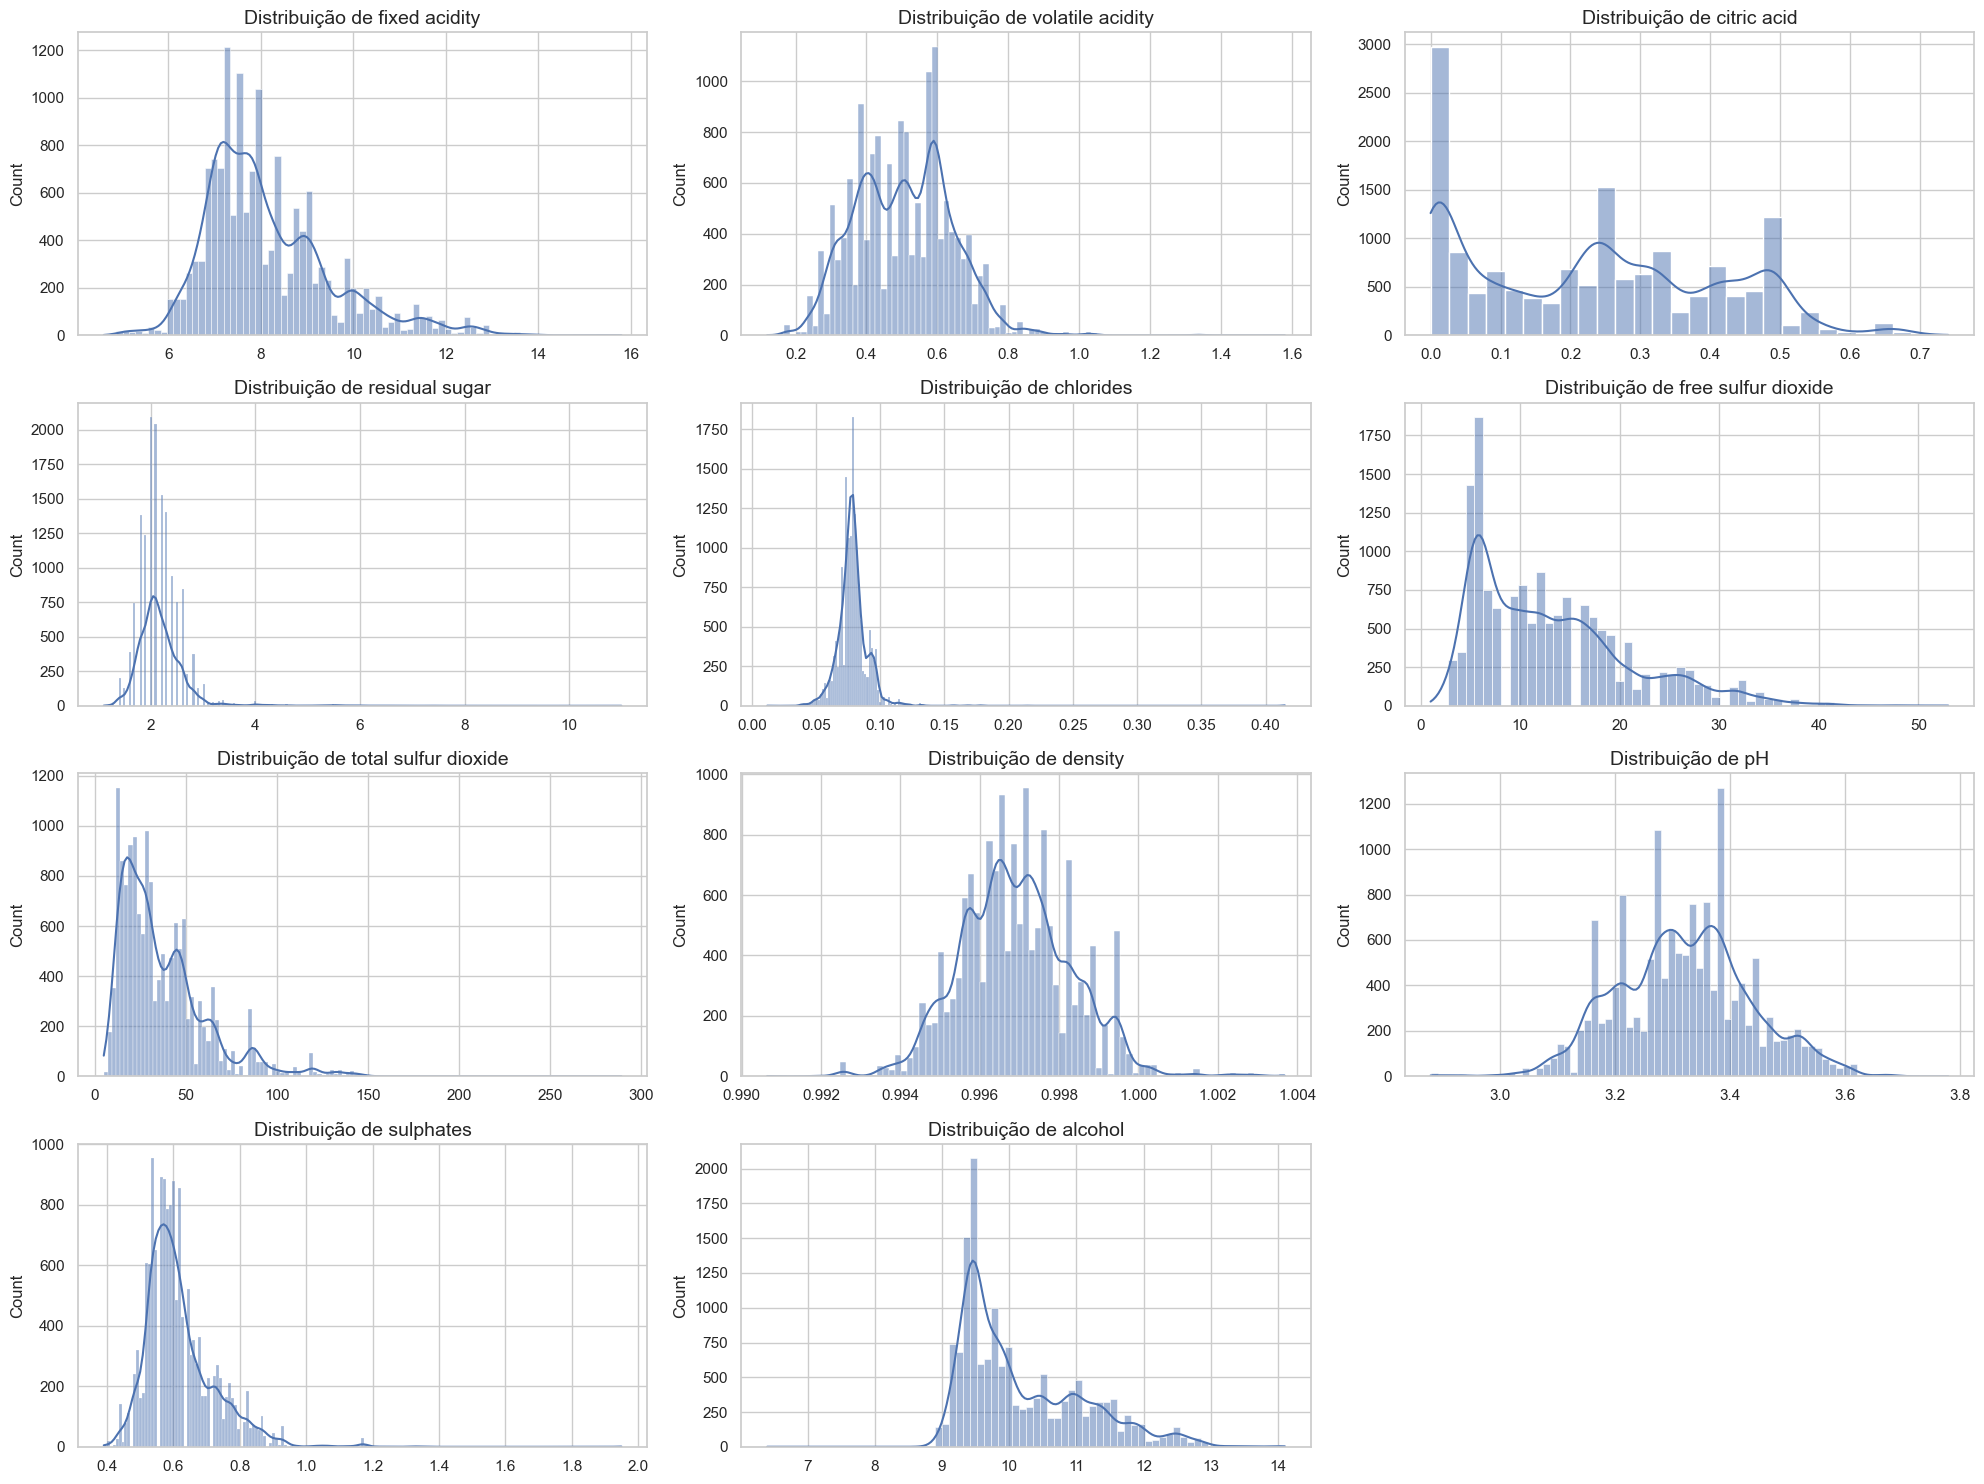

In [ ]:
# --- Ação 1.4: Análise Univariada (Histogramas) ---

print("--- Histogramas de todas as 11 Características ---")

# Vamos pegar todas as colunas, exceto 'id' e 'quality'
features = df_train.columns.drop(['id', 'quality'])

# Criar uma "grade" de gráficos. 
# Teremos 4 linhas e 3 colunas de gráficos.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

# Isso "achata" nossa grade de 4x3 para uma lista de 12 
# espaços para gráficos, facilitando o loop
axes = axes.flatten()

# Loop: Para cada característica na nossa lista 'features'...
for i, feature in enumerate(features):
    # ...desenhe um histograma (sns.histplot) nesse espaço (ax=axes[i])
    sns.histplot(df_train[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição de {feature}', fontsize=14)
    axes[i].set_xlabel('')

#Esconde o quadrado 12, já que temos só 11
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

# Ajusta o layout para não ficar tudo sobreposto
plt.tight_layout()
plt.show()

--- Análise: Álcool (alcohol) vs. Qualidade (quality) ---


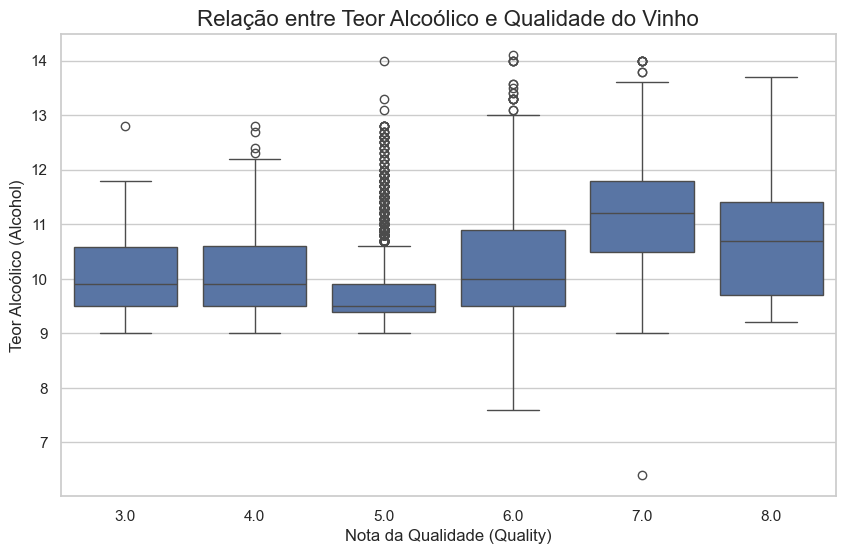

In [ ]:
# --- Ação 1.5: Análise Bivariada (Boxplots) ---
#Relação entre as características e a qualidade.

print("--- Análise: Álcool (alcohol) vs. Qualidade (quality) ---")

# Criar a figura para o gráfico
plt.figure(figsize=(10, 6))

# Criar o Gráfico de Caixa (Boxplot)
# x='quality'  -> Colocamos as notas 3-8 no eixo X
# y='alcohol'  -> Vemos a distribuição do álcool no eixo Y
sns.boxplot(x='quality', y='alcohol', data=df_train)

plt.title('Relação entre Teor Alcoólico e Qualidade do Vinho', fontsize=16)
plt.xlabel('Nota da Qualidade (Quality)')
plt.ylabel('Teor Alcoólico (Alcohol)')
plt.show()

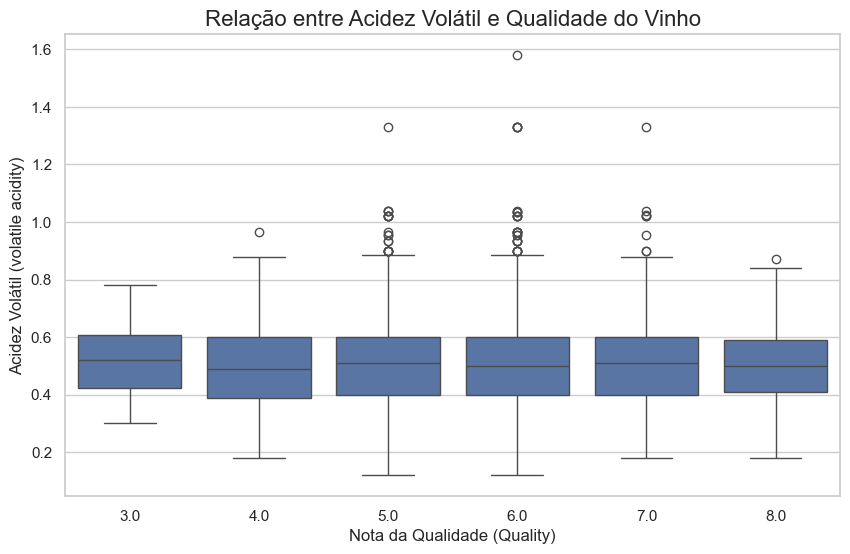

In [12]:
# --- Ação 1.5 (Teste 2) ---
# Relação entre 'volatile acidity' vs. 'quality'

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df_train)
plt.title('Relação entre Acidez Volátil e Qualidade do Vinho', fontsize=16)
plt.xlabel('Nota da Qualidade (Quality)')
plt.ylabel('Acidez Volátil (volatile acidity)')
plt.show()

--- Calculando a Matriz de Correlação ---

--- Correlação das Características com a 'quality' ---
quality                 1.000000
alcohol                 0.427173
sulphates               0.063442
residual sugar          0.022257
fixed acidity           0.018961
citric acid             0.014829
pH                      0.006518
id                      0.000613
chlorides              -0.001797
volatile acidity       -0.006902
free sulfur dioxide    -0.025582
density                -0.035284
total sulfur dioxide   -0.081557
Name: quality, dtype: float64

--- Desenhando o Mapa de Calor (Heatmap) ---


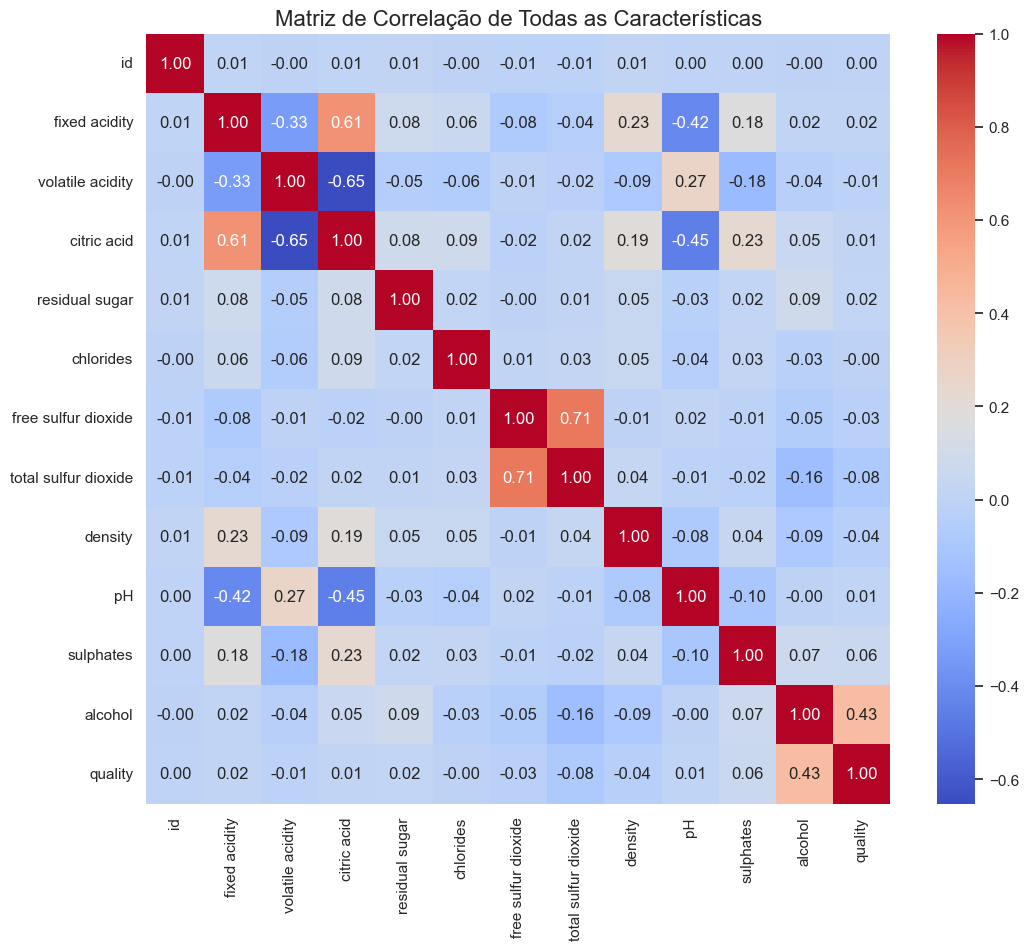

In [ ]:
# --- Ação 1.6: Análise Multivariada (Matriz de Correlação) ---

print("--- Calculando a Matriz de Correlação ---")

# 1. Calcular a correlação entre todas as colunas numéricas
# O .corr() é um comando do Pandas que faz todo o trabalho pesado
corr_matrix = df_train.corr()

# 2. Vamos ver apenas as correlações com a nossa variável-alvo: 'quality'
# Ordenando do mais forte (positivo ou negativo) para o mais fraco
print("\n--- Correlação das Características com a 'quality' ---")
print(corr_matrix['quality'].sort_values(ascending=False))


# 3. Desenhar o Mapa de Calor (Heatmap) para visualizar a matriz inteira
print("\n--- Desenhando o Mapa de Calor (Heatmap) ---")
#Criar a nossa figura 
plt.figure(figsize=(12, 10))

# O comando sns.heatmap() desenha a matriz de correlação
# annot=True -> Escreve os números (anotações) dentro de cada quadrado
# cmap='coolwarm' -> Um bom padrão de cores (vermelho=positivo, azul=negativo)
# fmt='.2f' -> Formata os números para terem apenas 2 casas decimais
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Todas as Características', fontsize=16)
plt.show()